# Leela Sotsky - CME 502 Final Project

# Materials Characterization

[[ 10.   294.     1.  ]
 [ 10.02 336.     1.  ]
 [ 10.04 345.     1.  ]
 ...
 [ 89.96 208.     1.  ]
 [ 89.98 188.     1.  ]
 [ 90.   191.     1.  ]]


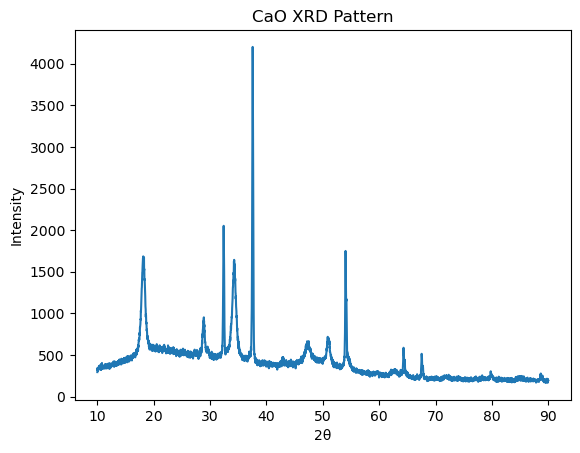

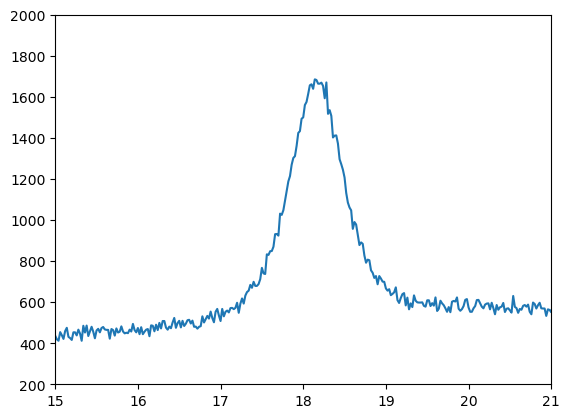

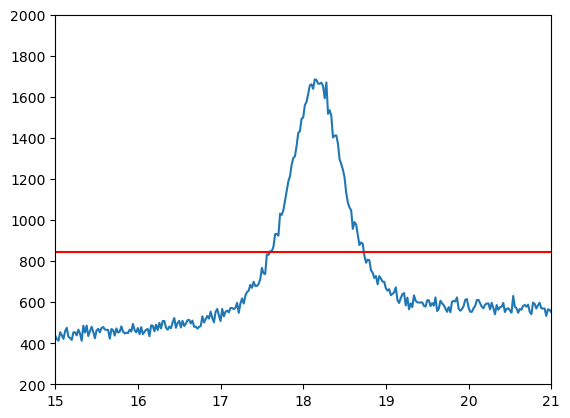

The crystallite size is 0.11


In [49]:
#XRD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

#Define a function that can read a .ras file, clean it up, and return only the relevant values
def read_xrd(file_path):
    data = []
    file = open(file_path, "r", encoding = "cp850")
    #There are characters in the file that 'charmap' codec can't decode (character maps to <undefined>)
    #encoding = "latin-1","cp850", etc. resolves this issue
        
    #Loop through the file, append all lines that don't start with * to a list, and convert values to floats
    for i in file:
        if i[0] != ("*"):
            data.append(list(map(float, i.split())))
            #use the map function to make every element a float
            #use the list function to return the map function outputs as a list
    
    #Return the list of values
    return np.array(data)

#Test out the function
xrd_file = "CaO.ras"  #Can be replaced with any file name
xrd_data = read_xrd(xrd_file)
print(xrd_data)

#Plot the data
plt.plot(xrd_data[:,0], xrd_data[:,1])
plt.title("CaO XRD Pattern")
plt.xlabel("2θ")
plt.ylabel("Intensity")
plt.show()

#Calculate the crystallite size using the Scherrer Equation
K = 0.9
wavelength = 1.54 #angstroms
plt.plot(xrd_data[:,0], xrd_data[:,1])
#focus on the specific peak of interest
plt.xlim(15,21)
plt.ylim(200,2000)
plt.show()

#Calculate the FWHM
two_theta = xrd_data[:,0]
intensity = xrd_data[:,1]
start = np.where(two_theta ==17)[0][0]
end = np.where(two_theta ==20)[0][0]
max_int = np.max(intensity[start:end+1])
max_int_index = np.argmax(intensity[start:end+1])
max_theta = two_theta[start:end+1][max_int_index]

intensity1 = 2052/2
tol = 2
indices = np.where(np.abs(intensity - intensity1) <= tol)
bounds = (start,end)
thetas = two_theta[indices[:bounds[1]]]
fwhm = thetas[1]-thetas[0]

plt.plot(xrd_data[:,0], xrd_data[:,1])
plt.xlim(15,21)
plt.ylim(200,2000)
plt.axhline(max_int/2,color='r')
plt.show()

#Define a function and calculate crystallite size
def scherrer_eqn(fwhm,theta,K,wavelength):
    return (K*wavelength)/(fwhm*np.cos(theta))

crystal_size = scherrer_eqn(fwhm,max_theta,K,wavelength)

print("The crystallite size is {:.2f}".format(crystal_size))

         Area     Mean      Min      Max    Angle  Length
0    1  5.984  156.131  141.314  174.968  103.761  30.028
1    2  7.913   47.585    0.745  161.679   80.774  39.599
2    3  6.850   75.100   47.220  163.000  -90.331  34.326
3    4  6.929   63.948   20.207  229.000  -29.501  34.651
4    5  9.724   57.273    8.883  172.000  -97.702  48.853
5    6  8.070   86.682   49.257  180.273   80.122  40.481
6    7  5.866  154.377  135.000  255.000 -103.285  29.357
7    8  9.487   56.747   13.200  168.000   88.091  47.645
8    9  3.504   40.356    2.487  143.087   25.688  17.394
9   10  5.787   95.033   27.000  197.000   85.301  29.066
10  11  6.850  122.102   58.364  185.428   70.102  34.394
11  12  8.936   35.900    6.413  124.356  -81.870  44.895
12  13  8.936   67.917    5.361  171.000   61.390  44.750
13  14  5.551  124.794   61.514  194.000   45.579  27.780
14  15  4.921   63.582   40.392  102.000   73.168  24.668
15  16  5.984   91.733   21.616  203.000   70.244  29.936
16  17  1.890 

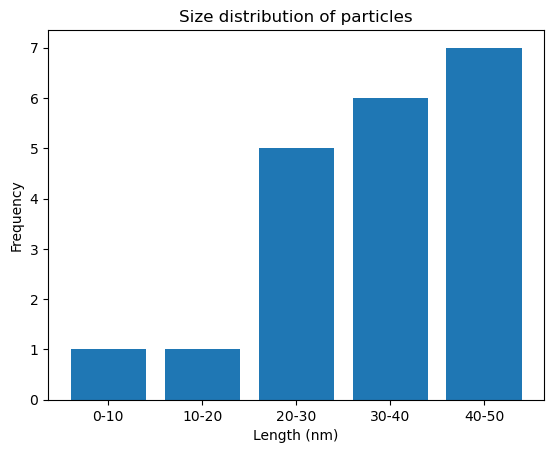

In [50]:
#TEM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Take an ImageJ csv file and unpack the Length data
TEM_results = pd.read_csv("ZrO2 Particles Results.csv")
TEM_df = pd.DataFrame(TEM_results)
print(TEM_df)
particle_length = TEM_df["Length"]

#Plot the size distribution for the particles
frequency = [0,0,0,0,0]
length = ["0-10","10-20","20-30","30-40","40-50"]

for i in particle_length:
    if 0<i<10:
        frequency[0] = frequency[0] + 1
    elif 10<i<20:
        frequency[1] = frequency[1] + 1
    elif 20<i<30:
        frequency[2] = frequency[2] + 1
    elif 30<i<40:
        frequency[3] = frequency[3] + 1
    elif 40<i<50:
        frequency[4] = frequency[4] + 1
    else:
        print("Error")
plt.bar(length,frequency)
plt.title("Size distribution of particles")
plt.xlabel("Length (nm)")
plt.ylabel("Frequency")

#Calculate standard deviation and standard error of the mean
SD = np.std(particle_length)
n = len(particle_length)
sem = SD/np.sqrt(n)

#Print the results
#print(TEM_results)
#print(particle_length)
print("The average particle size is {} ± {:.4f} nm".format(particle_length.mean(),SD))

# Electrochemical Experiment Analysis

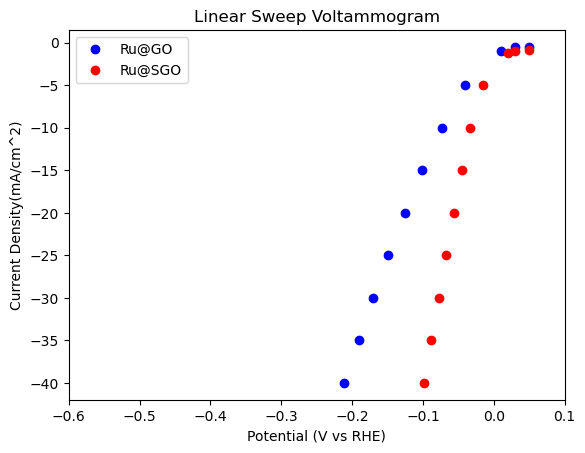

Ru@GO Results
The overpotential is 73.00 mV at a current density of 10 mA/cm^2

Ru@SGO Results
The overpotential is 33.70 mV at a current density of 10 mA/cm^2


In [51]:
#LSV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

#Read the data for Ru@GO and Ru@SGO
lsv_data1 = pd.read_csv("Ru@GO LSV Data.csv")
#print(lsv_data1)
lsv_df1 = pd.DataFrame(lsv_data1)
potential1 = lsv_df1.iloc[:,0].values
current_density1 = lsv_df1.iloc[:,1].values

lsv_data2 = pd.read_csv("Ru@SGO LSV Data.csv")
#print(lsv_data2)
lsv_df2 = pd.DataFrame(lsv_data2)
potential2 = lsv_df2.iloc[:,0].values
current_density2 = lsv_df2.iloc[:,1].values

#Plot the voltammogram
plt.plot(potential1,current_density1,'bo',label = "Ru@GO")
plt.plot(potential2,current_density2,'ro',label = "Ru@SGO")
plt.title("Linear Sweep Voltammogram")
plt.xlabel("Potential (V vs RHE)")
plt.ylabel("Current Density(mA/cm^2)")
plt.xlim(-0.6,0.1)
plt.legend()
plt.show()

#Calculate the overpotential at 10 mA/cm^2 for each sample
s = interp1d(potential1,current_density1,kind="linear")
x_int = np.linspace(min(potential1),max(potential1))
y_int = s(x_int)
#plt.plot(x_int,y_int,label='Interpolated Data')

#Call the interpolation function and interpolate at current density = -10 by making it an argument
current_density = -10
potential = interp1d(y_int,x_int)(current_density)
print("Ru@GO Results")
print("The overpotential is {:.2f} mV at a current density of 10 mA/cm^2\n".format(potential*-1000))

s2 = interp1d(potential2,current_density2,kind="linear")
x_int2 = np.linspace(min(potential2),max(potential2))
y_int2 = s2(x_int2)
#plt.plot(x_int2,y_int2,label='Interpolated Data')

current_density = -10
potential_2 = interp1d(y_int2,x_int2)(current_density)
print("Ru@SGO Results")
print("The overpotential is {:.2f} mV at a current density of 10 mA/cm^2".format(potential_2*-1000))